In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tarfile import XGLTYPE
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


# 데이터 불러오기

In [2]:
data = pd.read_csv("./house_data_final.csv")

In [3]:
data.head()

,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,Unnamed: 6,건축년도,도로명,매칭 구,...,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,평당가
0,개포래미안포레스트,74.66,202101,17,"245,000",7,NaN,2020,개포로,강남구,...,0.044976,30821.35259,0.022315,1847.35,2.93,2976.21,3.58,928.73,-4.10,10829.09188
1,개포래미안포레스트,59.92,202105,22,"198,500",18,NaN,2020,개포로,강남구,...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10932.07610
2,개포래미안포레스트,49.92,202105,22,"180,000",7,NaN,2020,개포로,강남구,...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11899.03846
3,개포래미안포레스트,59.92,202105,22,"198,500",18,NaN,2020,개포로,강남구,...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10932.07610
4,개포래미안포레스트,49.92,202105,22,"180,000",7,NaN,2020,개포로,강남구,...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11899.03846


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7862 entries, 0 to 7861
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   단지명                                 7862 non-null   object 
 1   전용면적(㎡)                             7862 non-null   float64
 2   계약년월                                7862 non-null   int64  
 3   계약일                                 7862 non-null   int64  
 4   거래금액(만원)                            7862 non-null   object 
 5   층                                   7862 non-null   int64  
 6   Unnamed: 6                          0 non-null      float64
 7   건축년도                                7862 non-null   int64  
 8   도로명                                 7862 non-null   object 
 9   매칭 구                                7862 non-null   object 
 10  건설수주_건축(단위 백만원)                     7862 non-null   object 
 11  건설수주_주택(단위 백만원)                     7862 no

# 결측치 확인 및 제거

In [5]:
data.isnull().sum()

단지명                                      0
전용면적(㎡)                                  0
계약년월                                     0
계약일                                      0
거래금액(만원)                                 0
층                                        0
Unnamed: 6                            7862
건축년도                                     0
도로명                                      0
매칭 구                                     0
건설수주_건축(단위 백만원)                          0
건설수주_주택(단위 백만원)                          0
매매가격지수(아파트)                              0
경상수지(백만불)                                0
무역수지(백만불)                                0
대출금액(아파트)(억원)                            0
대출잔액(아파트)(억원)                            0
서울_신규_분양세대(단위: 세대)                       0
아파트 동(호)수_(단위: 호)                        0
아파트 건물면적_(천)                           107
생산자물가지수 총지수                              0
전규모(1인이상) 전체임금총액[원]                      0
소비자물가지수 총지수                              0
소비자물가지수 주택,

In [6]:
data.drop(labels='Unnamed: 6',axis=1, inplace=True)
data.dropna(axis=0, inplace=True)

In [7]:
data.isnull().sum()

단지명                                   0
전용면적(㎡)                               0
계약년월                                  0
계약일                                   0
거래금액(만원)                              0
층                                     0
건축년도                                  0
도로명                                   0
매칭 구                                  0
건설수주_건축(단위 백만원)                       0
건설수주_주택(단위 백만원)                       0
매매가격지수(아파트)                           0
경상수지(백만불)                             0
무역수지(백만불)                             0
대출금액(아파트)(억원)                         0
대출잔액(아파트)(억원)                         0
서울_신규_분양세대(단위: 세대)                    0
아파트 동(호)수_(단위: 호)                     0
아파트 건물면적_(천)                          0
생산자물가지수 총지수                           0
전규모(1인이상) 전체임금총액[원]                   0
소비자물가지수 총지수                           0
소비자물가지수 주택, 수도, 전기 및 연료               0
가계대출 (연리%)                            0
경기종합지수(2020=100)                      0


# 데이터 타입 변환

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7755 entries, 0 to 7861
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   단지명                                 7755 non-null   object 
 1   전용면적(㎡)                             7755 non-null   float64
 2   계약년월                                7755 non-null   int64  
 3   계약일                                 7755 non-null   int64  
 4   거래금액(만원)                            7755 non-null   object 
 5   층                                   7755 non-null   int64  
 6   건축년도                                7755 non-null   int64  
 7   도로명                                 7755 non-null   object 
 8   매칭 구                                7755 non-null   object 
 9   건설수주_건축(단위 백만원)                     7755 non-null   object 
 10  건설수주_주택(단위 백만원)                     7755 non-null   object 
 11  매매가격지수(아파트)                         7755 no

In [9]:
# object -> float 형으로 데이터타입 변환
transaction_fee = data['거래금액(만원)']
CO_architecture = data['건설수주_건축(단위 백만원)']
CO_dwellinghouse = data['건설수주_주택(단위 백만원)']
current_balance = data['경상수지(백만불)']
trade_balance = data['무역수지(백만불)']
loan_amount = data['대출금액(아파트)(억원)']
loan_balance = data['대출잔액(아파트)(억원)']
Newly_Offered_Housing_Units_in_Seoul = data['서울_신규_분양세대(단위: 세대)']
employed_person = data['경제활동인구_취업자(단위: 천명)']
KOSPI = data['국제 주요국 주가지수(KOSPI)']
KRW_to_USD = data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원']

transaction_fee_comma_removed = transaction_fee.apply(lambda x: x.replace(',', ''))
data['거래금액(만원)'] = transaction_fee_comma_removed.astype(float)
CO_architecture_comma_removed = CO_architecture.apply(lambda x: x.replace(',', ''))
data['건설수주_건축(단위 백만원)'] = CO_architecture_comma_removed.astype(float)
CO_dwellinghouse_comma_removed = CO_dwellinghouse.apply(lambda x: x.replace(',', ''))
data['건설수주_주택(단위 백만원)'] = CO_dwellinghouse_comma_removed.astype(float)
current_balance_comma_removed = current_balance.apply(lambda x: x.replace(',', ''))
data['경상수지(백만불)'] = current_balance_comma_removed.astype(float)
trade_balance_comma_removed = trade_balance.apply(lambda x: x.replace(',', ''))
data['무역수지(백만불)'] = trade_balance_comma_removed.astype(float)
loan_amount_comma_removed = loan_amount.apply(lambda x: x.replace(',', ''))
data['대출금액(아파트)(억원)'] = loan_amount_comma_removed.astype(float)
loan_balance_comma_removed = loan_balance.apply(lambda x: x.replace(',', ''))
data['대출잔액(아파트)(억원)'] = loan_balance_comma_removed.astype(float)
Newly_Offered_Housing_Units_in_Seoul_comma_removed = Newly_Offered_Housing_Units_in_Seoul.apply(lambda x: x.replace(',', ''))
data['서울_신규_분양세대(단위: 세대)'] = Newly_Offered_Housing_Units_in_Seoul_comma_removed.astype(float)
employed_person_comma_removed = employed_person.apply(lambda x: x.replace(',', ''))
data['경제활동인구_취업자(단위: 천명)'] = employed_person_comma_removed.astype(float)
KOSPI_comma_removed = KOSPI.apply(lambda x: x.replace(',', ''))
data['국제 주요국 주가지수(KOSPI)'] = KOSPI_comma_removed.astype(float)
KRW_to_USD_comma_removed = KRW_to_USD.apply(lambda x: x.replace(',', ''))
data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원'] = KRW_to_USD_comma_removed.astype(float)

In [10]:
data_date_list = []

for index, row in data.iterrows():
    year_month = str(row['계약년월'])
    day = str(row['계약일']).zfill(2)
    data_date = year_month + day
    data_date_list.append(data_date)

print(data_date_list)

['20210117', '20210522', '20210522', '20210522', '20210522', '20210531', '20210613', '20210613', '20210615', '20210817', '20210821', '20210825', '20210831', '20210904', '20210908', '20210916', '20210917', '20210924', '20210928', '20211009', '20211013', '20211020', '20210107', '20210114', '20210118', '20210206', '20210215', '20210216', '20210222', '20210309', '20210310', '20210401', '20210413', '20210414', '20210508', '20210508', '20210518', '20210530', '20210609', '20210723', '20210724', '20210807', '20210814', '20210816', '20210819', '20210819', '20210821', '20210831', '20210831', '20210905', '20210905', '20210917', '20211009', '20211111', '20211231', '20210401', '20210501', '20210522', '20210529', '20210603', '20210618', '20210709', '20210714', '20210820', '20211009', '20211018', '20211023', '20211112', '20211207', '20211214', '20211215', '20210430', '20210526', '20210810', '20210305', '20210408', '20210424', '20210430', '20210529', '20210605', '20210605', '20210610', '20210612', '20

In [11]:
data = data.reset_index(drop=True)
data

,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,매칭 구,건설수주_건축(단위 백만원),...,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,평당가
0,개포래미안포레스트,74.66,202101,17,245000.0,7,2020,개포로,강남구,10589107.0,...,0.044976,30821.35259,0.022315,1847.35,2.93,2976.21,3.58,928.73,-4.10,10829.091880
1,개포래미안포레스트,59.92,202105,22,198500.0,18,2020,개포로,강남구,11699841.0,...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10932.076100
2,개포래미안포레스트,49.92,202105,22,180000.0,7,2020,개포로,강남구,11699841.0,...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11899.038460
3,개포래미안포레스트,59.92,202105,22,198500.0,18,2020,개포로,강남구,11699841.0,...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10932.076100
4,개포래미안포레스트,49.92,202105,22,180000.0,7,2020,개포로,강남구,11699841.0,...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11899.038460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7750,래미안하이베르,59.74,202011,28,104000.0,5,2011,퇴계로,중구,13510590.0,...,0.031414,29124.03662,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79,5744.894543
7751,래미안하이베르,59.74,202012,1,102000.0,5,2011,퇴계로,중구,22231493.0,...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,5634.415802
7752,래미안하이베르,59.74,202012,5,106000.0,13,2011,퇴계로,중구,22231493.0,...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,5855.373284
7753,래미안하이베르,84.98,202012,10,128000.0,2,2011,퇴계로,중구,22231493.0,...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,4970.581313


In [12]:
data_date = []

for i in range(len(data_date_list)):
    data_date.append(data_date_list[i][:4])

print(data_date)

['2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021',

In [13]:
data_date_modified = pd.DataFrame({'계약연도': data_date})
data_date_modified

,계약연도
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
7750,2020
7751,2020
7752,2020
7753,2020


In [14]:
data = pd.concat([data, data_date_modified], axis=1)
data = data.drop(labels=['계약년월', '계약일', '전용면적(㎡)', '거래금액(만원)', '도로명'],axis=1)

In [15]:
apt_brand = []

for i in range(len(data)):
    if "래미안" in data['단지명'][i]:
        apt_brand.append("래미안")

df = pd.DataFrame({'아파트 브랜드': apt_brand})
data = pd.concat([df, data], axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7755 entries, 0 to 7754
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   아파트 브랜드                             7755 non-null   object 
 1   단지명                                 7755 non-null   object 
 2   층                                   7755 non-null   int64  
 3   건축년도                                7755 non-null   int64  
 4   매칭 구                                7755 non-null   object 
 5   건설수주_건축(단위 백만원)                     7755 non-null   float64
 6   건설수주_주택(단위 백만원)                     7755 non-null   float64
 7   매매가격지수(아파트)                         7755 non-null   float64
 8   경상수지(백만불)                           7755 non-null   float64
 9   무역수지(백만불)                           7755 non-null   float64
 10  대출금액(아파트)(억원)                       7755 non-null   float64
 11  대출잔액(아파트)(억원)                       7755 no

# 클러스터링
---
- cluster 1: 강북구, 성북구, 은평구, 광진구, 서초구, 금천구
- cluster 2: 노원구, 중랑구, 강동구, 종로구, 중구, 서대문구, 용산구, 강남구, 마포구, 영등포구, 동작구, 관악구, 강서구, 양천구
- cluster 3: 성동구, 송파구
- cluster 4: 도봉구, 동대문구
- cluster 5: 구로구

In [17]:
gu = data['매칭 구']
gu

0       강남구
1       강남구
2       강남구
3       강남구
4       강남구
       ... 
7750     중구
7751     중구
7752     중구
7753     중구
7754     중구
Name: 매칭 구, Length: 7755, dtype: object

In [18]:
gu.unique()

array(['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구',
       '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구',
       '중구'], dtype=object)

In [19]:
cluster_1 = ['강북구', '성북구', '은평구', '광진구', '서초구', '금천구']
cluster_2 = ['노원구', '중랑구', '강동구', '종로구', '중구', '서대문구', '용산구', '강남구', '마포구', '영등포구', '동작구', '관악구', '강서구', '양천구']
cluster_3 = ['성동구', '송파구']
cluster_4 = ['도봉구', '동대문구']
cluster_5 = ['구로구']
    
clustering = []

for i in range(len(gu)):
    if any(keyword in gu[i] for keyword in cluster_1):
        clustering.append("cluster 1")
    elif any(keyword in gu[i] for keyword in cluster_2):
        clustering.append("cluster 2")
    elif any(keyword in gu[i] for keyword in cluster_3):
        clustering.append("cluster 3")
    elif any(keyword in gu[i] for keyword in cluster_4):
        clustering.append("cluster 4")
    else:
        clustering.append("cluster 5")


In [20]:
clustering = pd.DataFrame({'클러스터링_구': clustering})

In [21]:
clustering.describe()

,클러스터링_구
count,7755
unique,5
top,cluster 2
freq,3795


In [22]:
data = data.drop(columns=['매칭 구'], axis=1)
data = pd.concat([data, clustering], axis=1)

In [23]:
data

,아파트 브랜드,단지명,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),...,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,평당가,계약연도,클러스터링_구
0,래미안,개포래미안포레스트,7,2020,10589107.0,6436523.0,97.0,5762.0,3550.0,25979.03,...,0.022315,1847.35,2.93,2976.21,3.58,928.73,-4.10,10829.091880,2021,cluster 2
1,래미안,개포래미안포레스트,18,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,...,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10932.076100,2021,cluster 2
2,래미안,개포래미안포레스트,7,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,...,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11899.038460,2021,cluster 2
3,래미안,개포래미안포레스트,18,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,...,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10932.076100,2021,cluster 2
4,래미안,개포래미안포레스트,7,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,...,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11899.038460,2021,cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7750,래미안,래미안하이베르,5,2011,13510590.0,8663124.0,96.4,9619.0,5807.0,26045.45,...,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79,5744.894543,2020,cluster 2
7751,래미안,래미안하이베르,5,2011,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,...,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,5634.415802,2020,cluster 2
7752,래미안,래미안하이베르,13,2011,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,...,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,5855.373284,2020,cluster 2
7753,래미안,래미안하이베르,2,2011,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,...,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,4970.581313,2020,cluster 2


# 이상치 확인

In [24]:
"""
# 아파트 브랜드 별 이상치 확인으로 변경

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(x='매칭 구',y='평당가',data=data)
plt.xticks(rotation=90)
plt.show()

"""

"\n# 아파트 브랜드 별 이상치 확인으로 변경\n\nax = plt.figure(figsize=(15,10))\nax = sns.boxplot(x='매칭 구',y='평당가',data=data)\nplt.xticks(rotation=90)\nplt.show()\n\n"

In [25]:
#data.groupby('매칭 구').size()

- 사분위로 무조건 자를 것인지, 각 매칭 구별로 박스플롯 범위 내 값을 가진 데이터를 버릴 것인지
- 그렇게 진행했을 때 남은 데이터 크기가 충분한지

# 원핫인코딩

In [26]:
ohe = OneHotEncoder(sparse=False)

data_apt_brand = ohe.fit_transform(data[['아파트 브랜드']])
data_apt_brand

C:\Users\2001_\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [27]:
ohe.categories_

[array(['래미안'], dtype=object)]

In [28]:
data_apt_brand = pd.DataFrame(data_apt_brand, columns=['아파트 브랜드_' + col for col in ohe.categories_[0]])

In [29]:
data_transaction_year = ohe.fit_transform(data[['계약연도']])
data_transaction_year

C:\Users\2001_\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [30]:
ohe.categories_

[array(['2020', '2021', '2022'], dtype=object)]

In [31]:
data_transaction_year = pd.DataFrame(data_transaction_year, columns=['계약연도' + col for col in ohe.categories_[0]])

In [32]:
data_clustering_gu = ohe.fit_transform(data[['클러스터링_구']])
data_clustering_gu

C:\Users\2001_\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [33]:
ohe.categories_

[array(['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'],
       dtype=object)]

In [34]:
data_clustering_gu = pd.DataFrame(data_clustering_gu, columns=['클러스터링_구_' + col for col in ohe.categories_[0]])

In [35]:
data = data.drop(columns=['아파트 브랜드'])
data = data.drop(columns=['계약연도'])
data = data.drop(columns=['단지명'])
data = data.drop(columns=['클러스터링_구'])

In [36]:
data = pd.concat([data_apt_brand, data_transaction_year, data_clustering_gu, data], axis=1)

In [37]:
pd.set_option('display.max_columns', None)  # 모든 열을 출력하도록 설정
pd.set_option('display.expand_frame_repr', False)  # 너비 제한 없이 출력
data

,아파트 브랜드_래미안,계약연도2020,계약연도2021,계약연도2022,클러스터링_구_cluster 1,클러스터링_구_cluster 2,클러스터링_구_cluster 3,클러스터링_구_cluster 4,클러스터링_구_cluster 5,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),서울_신규_분양세대(단위: 세대),아파트 동(호)수_(단위: 호),아파트 건물면적_(천),생산자물가지수 총지수,전규모(1인이상) 전체임금총액[원],소비자물가지수 총지수,"소비자물가지수 주택, 수도, 전기 및 연료",가계대출 (연리%),경기종합지수(2020=100),경제활동인구_ 실업률(단위: %),경제활동인구_고용률(단위: %),경제활동인구_취업자(단위: 천명),국제 주요국 주가지수(KOSPI),예금은행 대출금리(신규취급액 기준)_대출평균(연%),예금은행 대출금리(잔액 기준)_총대출(연리%),주택매매가격지수(KB)_서울,소비자물가지수_총지수(가중치:1000?),"원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원",경기종합지수,S&P 500_close,S&P 500_change_rate,NASDAQ_close,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,평당가
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7,2020,10589107.0,6436523.0,97.0,5762.0,3550.0,25979.03,22748.79,234.0,5945,443606.1,105.05,3877199,101.04,100.35,2.83,103.8,5.7,57.4,25818.0,2976.21,2.72,2.80,89.828,101.04,1099.03,103.8,3793.748432,0.026639,13186.60578,0.044976,30821.35259,0.022315,1847.35,2.93,2976.21,3.58,928.73,-4.10,10829.091880
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,18,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,19920.09,360.0,5090,378668.0,108.65,3418087,102.05,101.44,2.89,106.3,4.0,61.2,27550.0,3203.92,2.72,2.78,93.144,102.05,1123.39,106.3,4167.849536,0.006441,13520.22905,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10932.076100
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,19920.09,360.0,5090,378668.0,108.65,3418087,102.05,101.44,2.89,106.3,4.0,61.2,27550.0,3203.92,2.72,2.78,93.144,102.05,1123.39,106.3,4167.849536,0.006441,13520.22905,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11899.038460
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,18,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,19920.09,360.0,5090,378668.0,108.65,3418087,102.05,101.44,2.89,106.3,4.0,61.2,27550.0,3203.92,2.72,2.78,93.144,102.05,1123.39,106.3,4167.849536,0.006441,13520.22905,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10932.076100
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,19920.09,360.0,5090,378668.0,108.65,3418087,102.05,101.44,2.89,106.3,4.0,61.2,27550.0,3203.92,2.72,2.78,93.144,102.05,1123.39,106.3,4167.849536,0.006441,13520.22905,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11899.038460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7750,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5,2011,13510590.0,8663124.0,96.4,9619.0,5807.0,26045.45,22428.73,99.0,4725,353790.6,103.09,3297755,100.09,100.18,2.72,102.6,3.4,60.7,27241.0,2591.34,2.71,2.81,87.613,100.09,1115.20,102.6,3548.992480,0.038112,11794.46152,0.031414,29124.03662,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79,5744.894543
7751,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5,2011,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,29943.84,1178.0,8764,665470.0,103.90,4003680,100.33,100.30,2.79,103.1,4.1,59.1,26526.0,2873.47,2.74,2.80,88.701,100.33,1094.50,103.1,3695.310014,0.041228,12619.05091,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,5634.415802
7752,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13,2011,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,29943.84,1178.0,8764,665470.0,103.90,4003680,100.33,100.30,2.79,103.1,4.1,59.1,26526.0,2873.47,2.74,2.80,88.701,100.33,1094.50,103.1,3695.310014,0.041228,12619.05091,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,5855.373284
7753,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2011,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,29943.84,1178.0,8764,665470.0,103.90,4003680,100.33,100.30,2.79,103.1,4.1,59.1,26526.0,2873.47,2.74,2.80,88.701,100.33,1094.50,103.1,3695.310014,0.0412

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7755 entries, 0 to 7754
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   아파트 브랜드_래미안                         7755 non-null   float64
 1   계약연도2020                            7755 non-null   float64
 2   계약연도2021                            7755 non-null   float64
 3   계약연도2022                            7755 non-null   float64
 4   클러스터링_구_cluster 1                   7755 non-null   float64
 5   클러스터링_구_cluster 2                   7755 non-null   float64
 6   클러스터링_구_cluster 3                   7755 non-null   float64
 7   클러스터링_구_cluster 4                   7755 non-null   float64
 8   클러스터링_구_cluster 5                   7755 non-null   float64
 9   층                                   7755 non-null   int64  
 10  건축년도                                7755 non-null   int64  
 11  건설수주_건축(단위 백만원)                     7755 no

# 정규화

In [39]:
data.columns

Index(['아파트 브랜드_래미안', '계약연도2020', '계약연도2021', '계약연도2022', '클러스터링_구_cluster 1',
       '클러스터링_구_cluster 2', '클러스터링_구_cluster 3', '클러스터링_구_cluster 4',
       '클러스터링_구_cluster 5', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '아파트 건물면적_(천)', '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', '

In [40]:
X = data[['아파트 브랜드_래미안', '계약연도2020', '계약연도2021', '계약연도2022', '클러스터링_구_cluster 1',
       '클러스터링_구_cluster 2', '클러스터링_구_cluster 3', '클러스터링_구_cluster 4',
       '클러스터링_구_cluster 5', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '아파트 건물면적_(천)', '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate']]
y = data[['평당가']]

In [41]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [42]:
X_std

array([[ 0.        , -1.29924655,  1.52494974, ...,  0.2106002 ,
         0.6334708 , -1.04842085],
       [ 0.        , -1.29924655,  1.52494974, ..., -0.09612024,
         1.03943659, -0.42773663],
       [ 0.        , -1.29924655,  1.52494974, ..., -0.09612024,
         1.03943659, -0.42773663],
       ...,
       [ 0.        ,  0.76967686, -0.65575932, ...,  1.456226  ,
         0.93719902,  1.06632768],
       [ 0.        ,  0.76967686, -0.65575932, ...,  1.456226  ,
         0.93719902,  1.06632768],
       [ 0.        ,  0.76967686, -0.65575932, ...,  1.456226  ,
         0.93719902,  1.06632768]])

In [43]:
X_std = pd.DataFrame(X_std, columns=X.columns)
X_std

,아파트 브랜드_래미안,계약연도2020,계약연도2021,계약연도2022,클러스터링_구_cluster 1,클러스터링_구_cluster 2,클러스터링_구_cluster 3,클러스터링_구_cluster 4,클러스터링_구_cluster 5,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),서울_신규_분양세대(단위: 세대),아파트 동(호)수_(단위: 호),아파트 건물면적_(천),생산자물가지수 총지수,전규모(1인이상) 전체임금총액[원],소비자물가지수 총지수,"소비자물가지수 주택, 수도, 전기 및 연료",가계대출 (연리%),경기종합지수(2020=100),경제활동인구_ 실업률(단위: %),경제활동인구_고용률(단위: %),경제활동인구_취업자(단위: 천명),국제 주요국 주가지수(KOSPI),예금은행 대출금리(신규취급액 기준)_대출평균(연%),예금은행 대출금리(잔액 기준)_총대출(연리%),주택매매가격지수(KB)_서울,소비자물가지수_총지수(가중치:1000?),"원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원",경기종합지수,S&P 500_close,S&P 500_change_rate,NASDAQ_close,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate
0,0.0,-1.299247,1.524950,-0.2771,-0.674111,1.021508,-0.259422,-0.341277,-0.178322,-0.573975,1.680987,-0.686578,-0.668343,-0.080759,-0.336701,0.159660,0.246116,0.409622,-0.379094,-0.326663,-0.338807,-0.182877,1.067300,-0.059634,-0.203467,-0.205215,0.386176,2.641116,-2.867784,-2.499728,0.988404,-0.435191,-0.786942,0.290077,-0.059634,-1.430893,0.386176,0.352939,0.083009,0.725717,0.217042,0.351545,0.067106,1.116991,0.072886,0.988404,0.210600,0.633471,-1.048421
1,0.0,-1.299247,1.524950,-0.2771,-0.674111,1.021508,-0.259422,-0.341277,-0.178322,0.998828,1.680987,-0.379257,-1.015406,0.541576,1.283700,-0.113654,-0.161691,0.021430,-0.338270,-0.537551,-0.544876,0.590084,-0.608003,0.429821,0.367701,-0.069921,1.104627,0.203892,0.831785,0.869442,1.497800,-0.435191,-0.868468,0.803178,0.429821,-0.958449,1.104627,1.068785,-0.387581,0.889954,-1.154334,1.311093,-0.122024,1.436829,-0.241179,1.497800,-0.096120,1.039437,-0.427737
2,0.0,-1.299247,1.524950,-0.2771,-0.674111,1.021508,-0.259422,-0.341277,-0.178322,-0.573975,1.680987,-0.379257,-1.015406,0.541576,1.283700,-0.113654,-0.161691,0.021430,-0.338270,-0.537551,-0.544876,0.590084,-0.608003,0.429821,0.367701,-0.069921,1.104627,0.203892,0.831785,0.869442,1.497800,-0.435191,-0.868468,0.803178,0.429821,-0.958449,1.104627,1.068785,-0.387581,0.889954,-1.154334,1.311093,-0.122024,1.436829,-0.241179,1.497800,-0.096120,1.039437,-0.427737
3,0.0,-1.299247,1.524950,-0.2771,-0.674111,1.021508,-0.259422,-0.341277,-0.178322,0.998828,1.680987,-0.379257,-1.015406,0.541576,1.283700,-0.113654,-0.161691,0.021430,-0.338270,-0.537551,-0.544876,0.590084,-0.608003,0.429821,0.367701,-0.069921,1.104627,0.203892,0.831785,0.869442,1.497800,-0.435191,-0.868468,0.803178,0.429821,-0.958449,1.104627,1.068785,-0.387581,0.889954,-1.154334,1.311093,-0.122024,1.436829,-0.241179,1.497800,-0.096120,1.039437,-0.427737
4,0.0,-1.299247,1.524950,-0.2771,-0.674111,1.021508,-0.259422,-0.341277,-0.178322,-0.573975,1.680987,-0.379257,-1.015406,0.541576,1.283700,-0.113654,-0.161691,0.021430,-0.338270,-0.537551,-0.544876,0.590084,-0.608003,0.429821,0.367701,-0.069921,1.104627,0.203892,0.831785,0.869442,1.497800,-0.435191,-0.868468,0.803178,0.429821,-0.958449,1.104627,1.068785,-0.387581,0.889954,-1.154334,1.311093,-0.122024,1.436829,-0.241179,1.497800,-0.096120,1.039437,-0.427737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7750,0.0,0.769677,-0.655759,-0.2771,-0.674111,1.021508,-0.259422,-0.341277,-0.178322,-0.859939,0.315383,0.121745,0.221961,-0.267459,0.790420,0.997798,0.252797,0.365699,-0.422834,-0.627580,-0.623820,-0.603712,-1.047096,-0.520013,-0.292548,-0.453255,0.041319,-0.656304,0.344999,0.268360,0.127436,-0.464395,-0.746178,-0.052660,-0.520013,-1.117288,0.041319,-0.115404,0.350319,0.040387,-0.040099,-0.120673,0.459622,0.163404,1.983864,0.127436,2.037291,0.307321,1.461165
7751,0.0,0.769677,-0.655759,-0.2771,-0.674111,1.021508,-0.259422,-0.341277,-0.178322,-0.859939,0.315383,2.534665,2.811029,-0.205226,1.504624,1.327186,1.118777,1.397022,-0.073236,0.368654,0.365238,-0.429795,1.528830,-0.403707,-0.229667,-0.295412,

# 상관계수 및 히트맵

In [44]:
pd.set_option('display.max_columns', None)  # 모든 열을 출력하도록 설정
pd.set_option('display.expand_frame_repr', False)  # 너비 제한 없이 출력
data_corr = data.corr()
data_corr

,아파트 브랜드_래미안,계약연도2020,계약연도2021,계약연도2022,클러스터링_구_cluster 1,클러스터링_구_cluster 2,클러스터링_구_cluster 3,클러스터링_구_cluster 4,클러스터링_구_cluster 5,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),서울_신규_분양세대(단위: 세대),아파트 동(호)수_(단위: 호),아파트 건물면적_(천),생산자물가지수 총지수,전규모(1인이상) 전체임금총액[원],소비자물가지수 총지수,"소비자물가지수 주택, 수도, 전기 및 연료",가계대출 (연리%),경기종합지수(2020=100),경제활동인구_ 실업률(단위: %),경제활동인구_고용률(단위: %),경제활동인구_취업자(단위: 천명),국제 주요국 주가지수(KOSPI),예금은행 대출금리(신규취급액 기준)_대출평균(연%),예금은행 대출금리(잔액 기준)_총대출(연리%),주택매매가격지수(KB)_서울,소비자물가지수_총지수(가중치:1000?),"원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원",경기종합지수,S&P 500_close,S&P 500_change_rate,NASDAQ_close,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,평당가
아파트 브랜드_래미안,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
계약연도2020,NaN,1.000000,-0.851993,-0.360021,-0.049847,0.007903,0.046008,0.027896,-0.003223,-0.025050,-0.076571,0.055877,0.292106,-0.842506,0.112727,0.446402,0.280473,0.167703,0.285526,0.624964,0.629544,-0.807543,-0.335271,-0.759740,-0.610266,-0.590683,-0.889928,0.214725,-0.221149,-0.372665,-0.802876,-0.362290,0.145620,-0.877275,-0.759740,0.148621,-0.889928,-0.868973,0.218820,-0.818953,0.392790,-0.861697,0.179905,-0.773716,0.376850,-0.802876,0.320614,-0.668579,0.381988,-0.269938
계약연도2021,NaN,-0.851993,1.000000,-0.181711,0.020859,-0.002358,-0.020878,-0.014971,0.006721,0.008710,0.048007,-0.109610,-0.281596,0.567962,0.066380,-0.114670,-0.104164,0.015839,-0.238402,-0.438225,-0.442330,0.433487,0.223538,0.346587,0.200143,0.147949,0.674436,-0.037431,-0.025740,0.099824,0.832548,-0.073524,-0.486012,0.624546,0.346587,-0.446151,0.674436,0.744710,-0.056439,0.790560,-0.193820,0.755381,-0.066346,0.816566,-0.257598,0.832548,-0.206548,0.703847,-0.247954,0.213912
계약연도2022,NaN,-0.360021,-0.181711,1.000000,0.056454,-0.010642,-0.049209,-0.025718,-0.005923,0.031530,0.058273,0.090369,-0.046853,0.570340,-0.330011,-0.634109,-0.341178,-0.343209,-0.111464,-0.392930,-0.394219,0.744298,0.231384,0.809365,0.789573,0.845800,0.469678,-0.336602,0.461236,0.522068,0.024427,0.811479,0.592541,0.534814,0.809365,0.515874,0.469678,0.305096,-0.310421,0.129445,-0.392371,0.272414,-0.219677,-0.001864,-0.248783,0.024427,-0.234129,0.001525,-0.275618,0.125824
클러스터링_구_cluster 1,NaN,-0.049847,0.020859,0.056454,1.000000,-0.659918,-0.174879,-0.230059,-0.120209,-0.002215,0.056706,-0.020743,-0.038702,0.037957,-0.053732,-0.070891,0.015280,0.015995,-0.022649,-0.035326,-0.036438,0.057089,0.022578,0.058606,0.062175,0.068949,0.039063,-0.008059,0.013171,0.019765,0.016217,0.071952,0.054422,0.039415,0.058606,0.028417,0.039063,0.028763,-0.030679,0.012548,-0.030331,0.032484,-0.030914,0.013367,-0.036728,0.016217,-0.033683,-0.005906,-0.030289,-0.061867
클러스터링_구_cluster 2,NaN,0.007903,-0.002358,-0.010642,-0.659918,1.000000,-0.253960,-0.334091,-0.174568,0.027208,-0.005322,0.022563,0.028391,0.005800,0.049692,0.042014,-0.026655,-0.021887,0.003703,-0.001962,-0.001396,-0.008336,-0.013413,-0.009409,-0.020965,-0.024923,0.010544,-0.014972,0.009899,0.010024,0.017816,-0.035765,-0.045823,0.007857,-0.009409,-0.029169,0.010544,0.011312,0.013045,0.020161,0.005727,0.007787,0.015214,0.018892,0.024618,0.017816,0.024688,0.033628,0.012794,0.190108
클러스터링_구_cluster 3,NaN,0.046008,-0.020878,-0.049209,-0.174879,-0.253960,1.000000,-0.088535,-0.046261,-0.016612,-0.045690,0.024170,0.032344,-0.054165,0.010872,0.024954,-0.000213,-0.006132,0.013357,0.052491,0.052930,-0.053989,-0.036874,-0.056083,-0.043971,-0.051778,-0.053954,0.025513,-0.010028,-0.018449,-0.036570,-0.044698,-0.010601,-0.055151,-0.056083,0.008008,-0.053954,-0.050100,0.027542,-0.041600,0.035115,-0.049894,0.029145,-0.035622,0.018212,-0.036570,0.014330,-0.029576,0.023283,0.015757
클러스터링_구_cluster 4,NaN,0.027896,-0.014971,-0.025718,-0.230059,-0.334091,-0.088535,1.000000,-0.060857

C:\Users\2001_\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\2001_\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\2001_\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


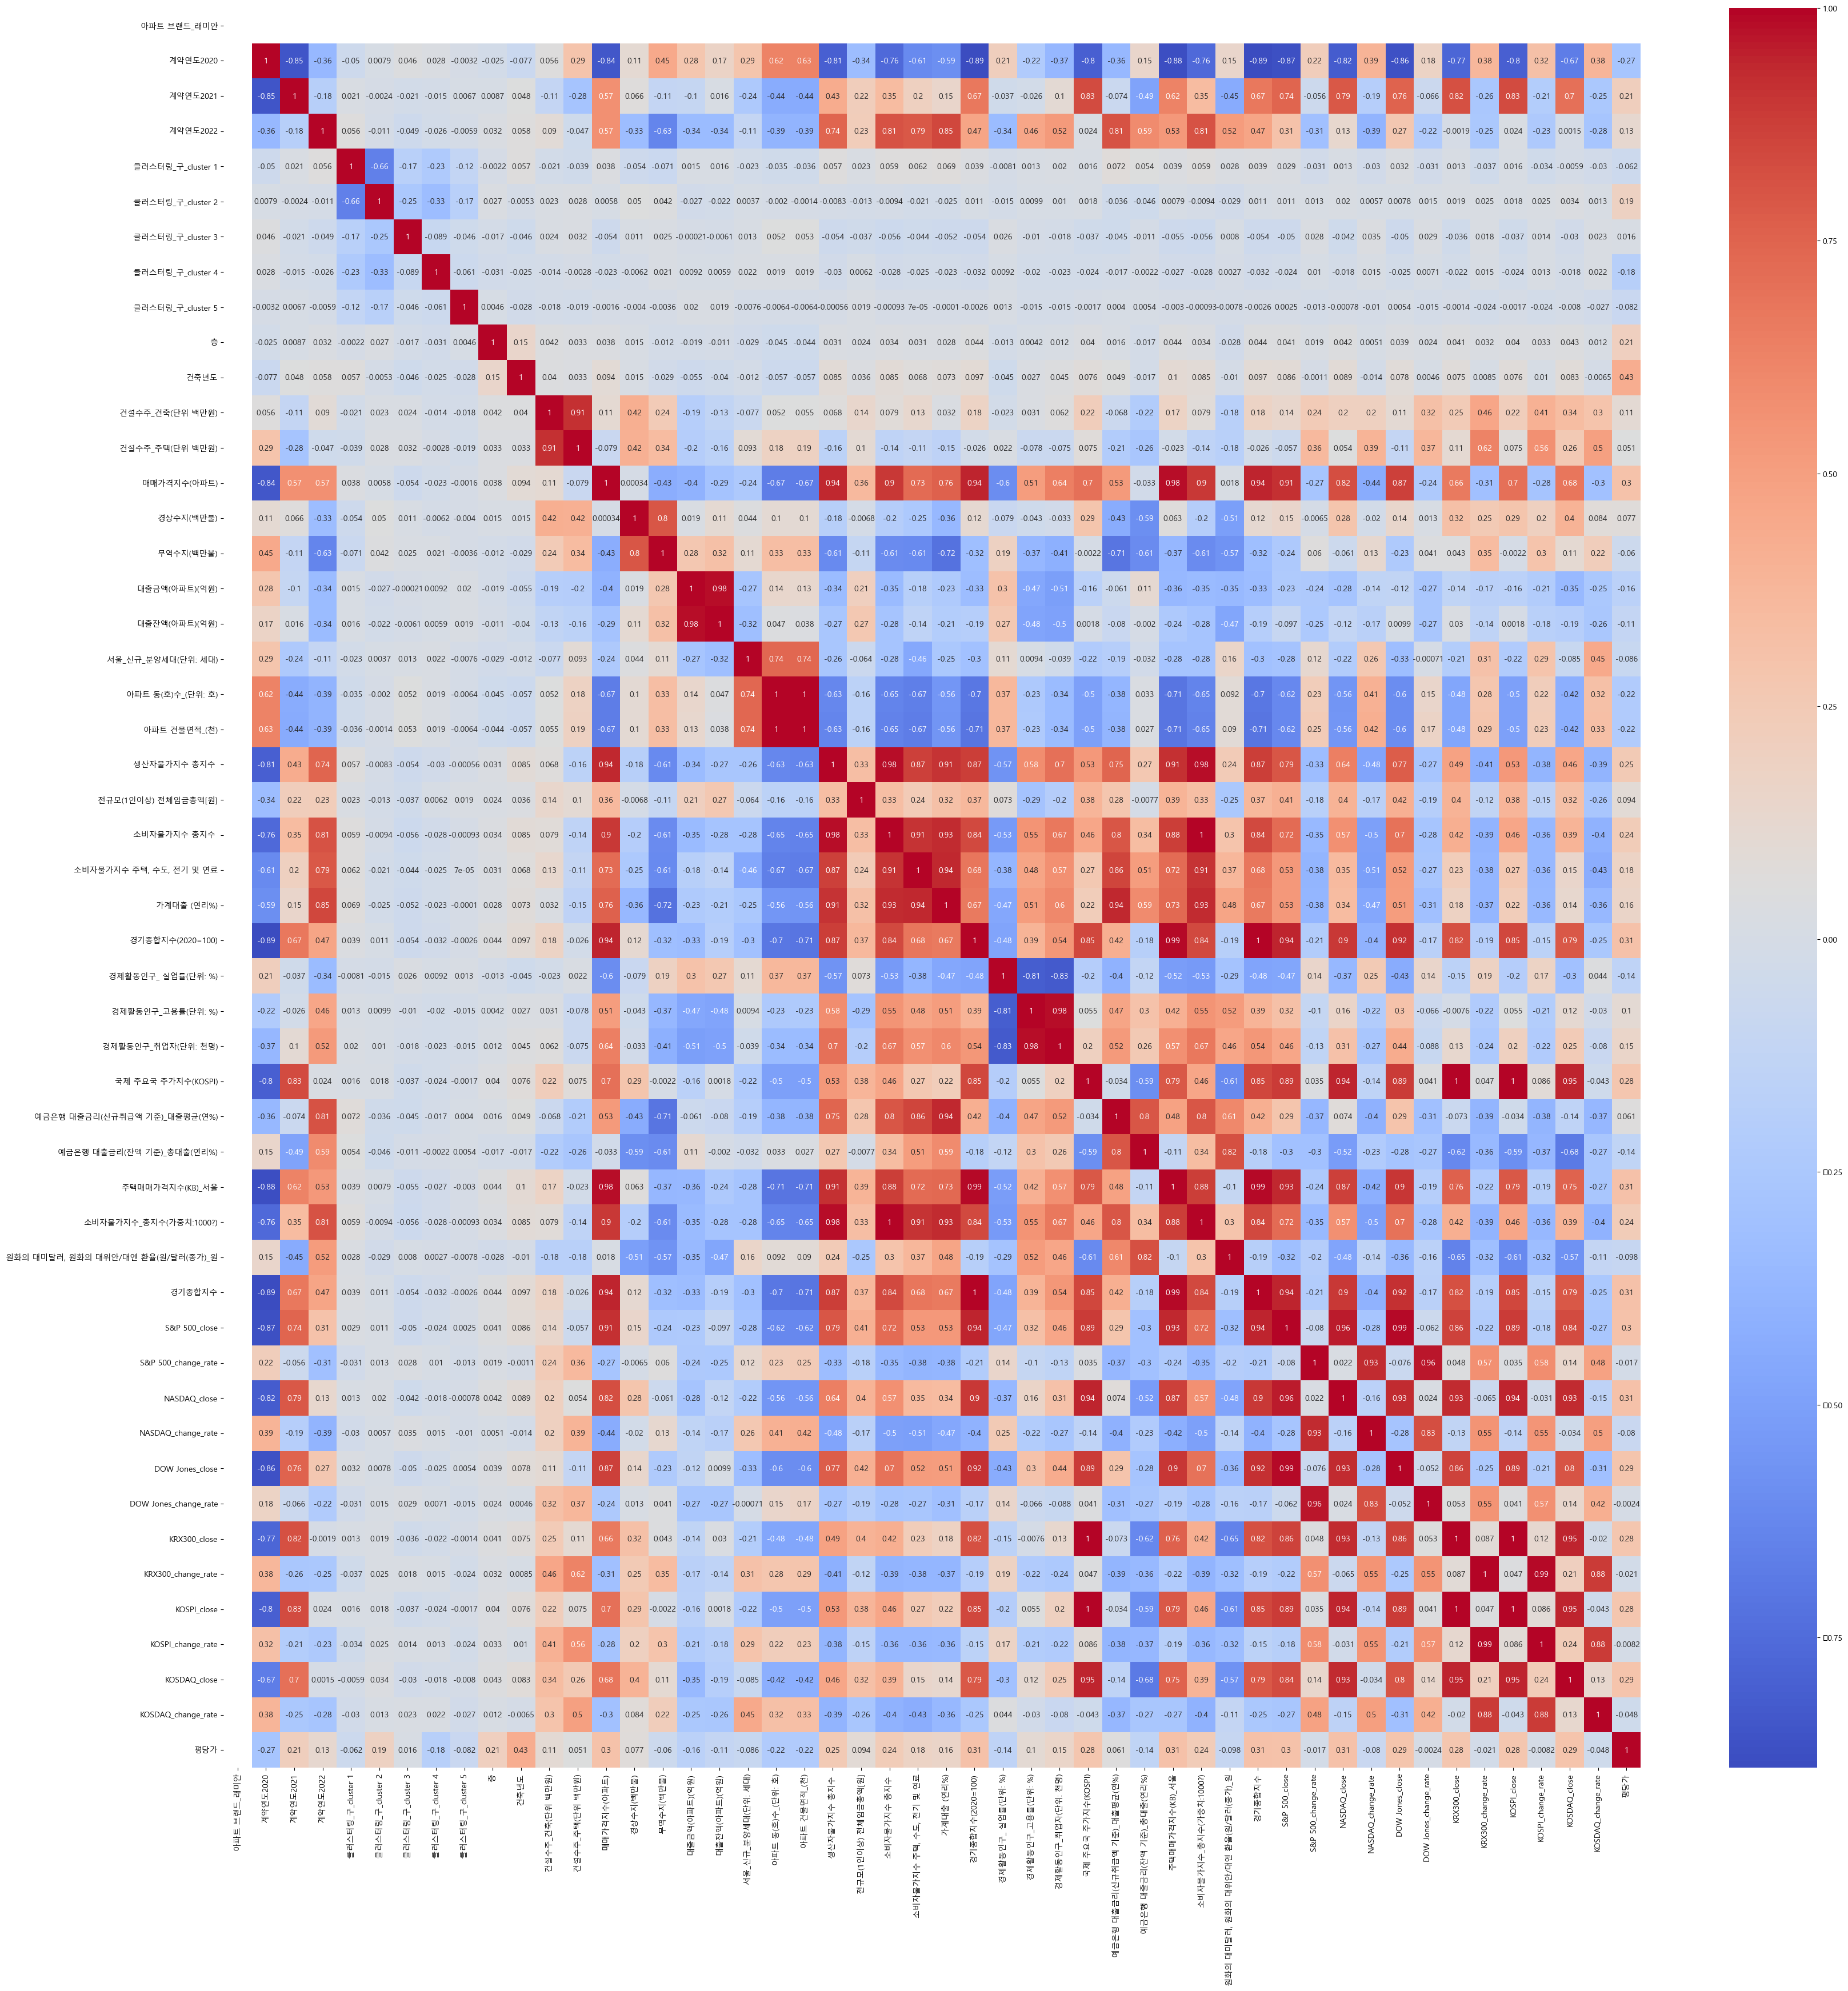

In [45]:
plt.figure(figsize=(40,40))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

In [46]:
# 상관계수 +- 0.3 미만 값들
data_corr_index = data_corr[abs(data_corr['평당가'])<0.3].index
data_corr_index

Index(['계약연도2020', '계약연도2021', '계약연도2022', '클러스터링_구_cluster 1',
       '클러스터링_구_cluster 2', '클러스터링_구_cluster 3', '클러스터링_구_cluster 4',
       '클러스터링_구_cluster 5', '층', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)', '대출잔액(아파트)(억원)',
       '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)', '아파트 건물면적_(천)',
       '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경제활동인구_ 실업률(단위: %)',
       '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)', '국제 주요국 주가지수(KOSPI)',
       '예금은행 대출금리(신규취급액 기준)_대출평균(연%)', '예금은행 대출금리(잔액 기준)_총대출(연리%)',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       'S&P 500_change_rate', 'NASDAQ_change_rate', 'DOW Jones_close',
       'DOW Jones_change_rate', 'KRX300_close', 'KRX300_change_rate',
       'KOSPI_close', 'KOSPI_change_rate', 'KOSDAQ_close',
       'KOSDAQ_change_rate'],
      dtype='object')

In [47]:
# 상관계수 +- 0.3 이상 값들
data_index = data_corr[abs(data_corr['평당가'])>=0.3].index
data_index

Index(['건축년도', '매매가격지수(아파트)', '경기종합지수(2020=100)', '주택매매가격지수(KB)_서울', '경기종합지수',
       'S&P 500_close', 'NASDAQ_close', '평당가'],
      dtype='object')

# 다중공선성 확인(VIF)

In [48]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

C:\Users\2001_\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\2001_\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000e+00,아파트 브랜드_래미안
1,1.058965e+00,층
2,1.269325e+00,건축년도
3,1.522437e+00,평당가
4,3.504747e+13,무역수지(백만불)
5,3.721983e+13,"소비자물가지수 주택, 수도, 전기 및 연료"
6,6.721790e+13,건설수주_주택(단위 백만원)
7,1.047349e+14,건설수주_건축(단위 백만원)
8,1.217189e+14,경상수지(백만불)
9,2.144571e+14,전규모(1인이상) 전체임금총액[원]


In [49]:
vif[vif['VIF Factor']<=10]

,VIF Factor,features
0,0.000000,아파트 브랜드_래미안
1,1.058965,층
2,1.269325,건축년도
3,1.522437,평당가


살아남는 변수가 너무 없다 -> scaler 후에 살펴보자

In [50]:
X_std

,아파트 브랜드_래미안,계약연도2020,계약연도2021,계약연도2022,클러스터링_구_cluster 1,클러스터링_구_cluster 2,클러스터링_구_cluster 3,클러스터링_구_cluster 4,클러스터링_구_cluster 5,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),서울_신규_분양세대(단위: 세대),아파트 동(호)수_(단위: 호),아파트 건물면적_(천),생산자물가지수 총지수,전규모(1인이상) 전체임금총액[원],소비자물가지수 총지수,"소비자물가지수 주택, 수도, 전기 및 연료",가계대출 (연리%),경기종합지수(2020=100),경제활동인구_ 실업률(단위: %),경제활동인구_고용률(단위: %),경제활동인구_취업자(단위: 천명),국제 주요국 주가지수(KOSPI),예금은행 대출금리(신규취급액 기준)_대출평균(연%),예금은행 대출금리(잔액 기준)_총대출(연리%),주택매매가격지수(KB)_서울,소비자물가지수_총지수(가중치:1000?),"원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원",경기종합지수,S&P 500_close,S&P 500_change_rate,NASDAQ_close,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate
0,0.0,-1.299247,1.524950,-0.2771,-0.674111,1.021508,-0.259422,-0.341277,-0.178322,-0.573975,1.680987,-0.686578,-0.668343,-0.080759,-0.336701,0.159660,0.246116,0.409622,-0.379094,-0.326663,-0.338807,-0.182877,1.067300,-0.059634,-0.203467,-0.205215,0.386176,2.641116,-2.867784,-2.499728,0.988404,-0.435191,-0.786942,0.290077,-0.059634,-1.430893,0.386176,0.352939,0.083009,0.725717,0.217042,0.351545,0.067106,1.116991,0.072886,0.988404,0.210600,0.633471,-1.048421
1,0.0,-1.299247,1.524950,-0.2771,-0.674111,1.021508,-0.259422,-0.341277,-0.178322,0.998828,1.680987,-0.379257,-1.015406,0.541576,1.283700,-0.113654,-0.161691,0.021430,-0.338270,-0.537551,-0.544876,0.590084,-0.608003,0.429821,0.367701,-0.069921,1.104627,0.203892,0.831785,0.869442,1.497800,-0.435191,-0.868468,0.803178,0.429821,-0.958449,1.104627,1.068785,-0.387581,0.889954,-1.154334,1.311093,-0.122024,1.436829,-0.241179,1.497800,-0.096120,1.039437,-0.427737
2,0.0,-1.299247,1.524950,-0.2771,-0.674111,1.021508,-0.259422,-0.341277,-0.178322,-0.573975,1.680987,-0.379257,-1.015406,0.541576,1.283700,-0.113654,-0.161691,0.021430,-0.338270,-0.537551,-0.544876,0.590084,-0.608003,0.429821,0.367701,-0.069921,1.104627,0.203892,0.831785,0.869442,1.497800,-0.435191,-0.868468,0.803178,0.429821,-0.958449,1.104627,1.068785,-0.387581,0.889954,-1.154334,1.311093,-0.122024,1.436829,-0.241179,1.497800,-0.096120,1.039437,-0.427737
3,0.0,-1.299247,1.524950,-0.2771,-0.674111,1.021508,-0.259422,-0.341277,-0.178322,0.998828,1.680987,-0.379257,-1.015406,0.541576,1.283700,-0.113654,-0.161691,0.021430,-0.338270,-0.537551,-0.544876,0.590084,-0.608003,0.429821,0.367701,-0.069921,1.104627,0.203892,0.831785,0.869442,1.497800,-0.435191,-0.868468,0.803178,0.429821,-0.958449,1.104627,1.068785,-0.387581,0.889954,-1.154334,1.311093,-0.122024,1.436829,-0.241179,1.497800,-0.096120,1.039437,-0.427737
4,0.0,-1.299247,1.524950,-0.2771,-0.674111,1.021508,-0.259422,-0.341277,-0.178322,-0.573975,1.680987,-0.379257,-1.015406,0.541576,1.283700,-0.113654,-0.161691,0.021430,-0.338270,-0.537551,-0.544876,0.590084,-0.608003,0.429821,0.367701,-0.069921,1.104627,0.203892,0.831785,0.869442,1.497800,-0.435191,-0.868468,0.803178,0.429821,-0.958449,1.104627,1.068785,-0.387581,0.889954,-1.154334,1.311093,-0.122024,1.436829,-0.241179,1.497800,-0.096120,1.039437,-0.427737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7750,0.0,0.769677,-0.655759,-0.2771,-0.674111,1.021508,-0.259422,-0.341277,-0.178322,-0.859939,0.315383,0.121745,0.221961,-0.267459,0.790420,0.997798,0.252797,0.365699,-0.422834,-0.627580,-0.623820,-0.603712,-1.047096,-0.520013,-0.292548,-0.453255,0.041319,-0.656304,0.344999,0.268360,0.127436,-0.464395,-0.746178,-0.052660,-0.520013,-1.117288,0.041319,-0.115404,0.350319,0.040387,-0.040099,-0.120673,0.459622,0.163404,1.983864,0.127436,2.037291,0.307321,1.461165
7751,0.0,0.769677,-0.655759,-0.2771,-0.674111,1.021508,-0.259422,-0.341277,-0.178322,-0.859939,0.315383,2.534665,2.811029,-0.205226,1.504624,1.327186,1.118777,1.397022,-0.073236,0.368654,0.365238,-0.429795,1.528830,-0.403707,-0.229667,-0.295412,

In [51]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_std.values, i) for i in range(X_std.shape[1])]
vif["features"] = X_std.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

C:\Users\2001_\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\2001_\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.032501e+00,층
1,1.045988e+00,건축년도
2,2.144115e+03,매매가격지수(아파트)
3,2.496926e+03,경기종합지수
4,2.688604e+03,계약연도2021
5,2.860561e+03,소비자물가지수 총지수
6,3.049010e+03,계약연도2020
7,3.930430e+03,아파트 건물면적_(천)
8,5.115915e+03,경기종합지수(2020=100)
9,5.358535e+03,S&P 500_close


In [52]:
vif[vif['VIF Factor']<=10]

,VIF Factor,features
0,1.032501,층
1,1.045988,건축년도


남는 변수가 없음
=> 해결책 강구

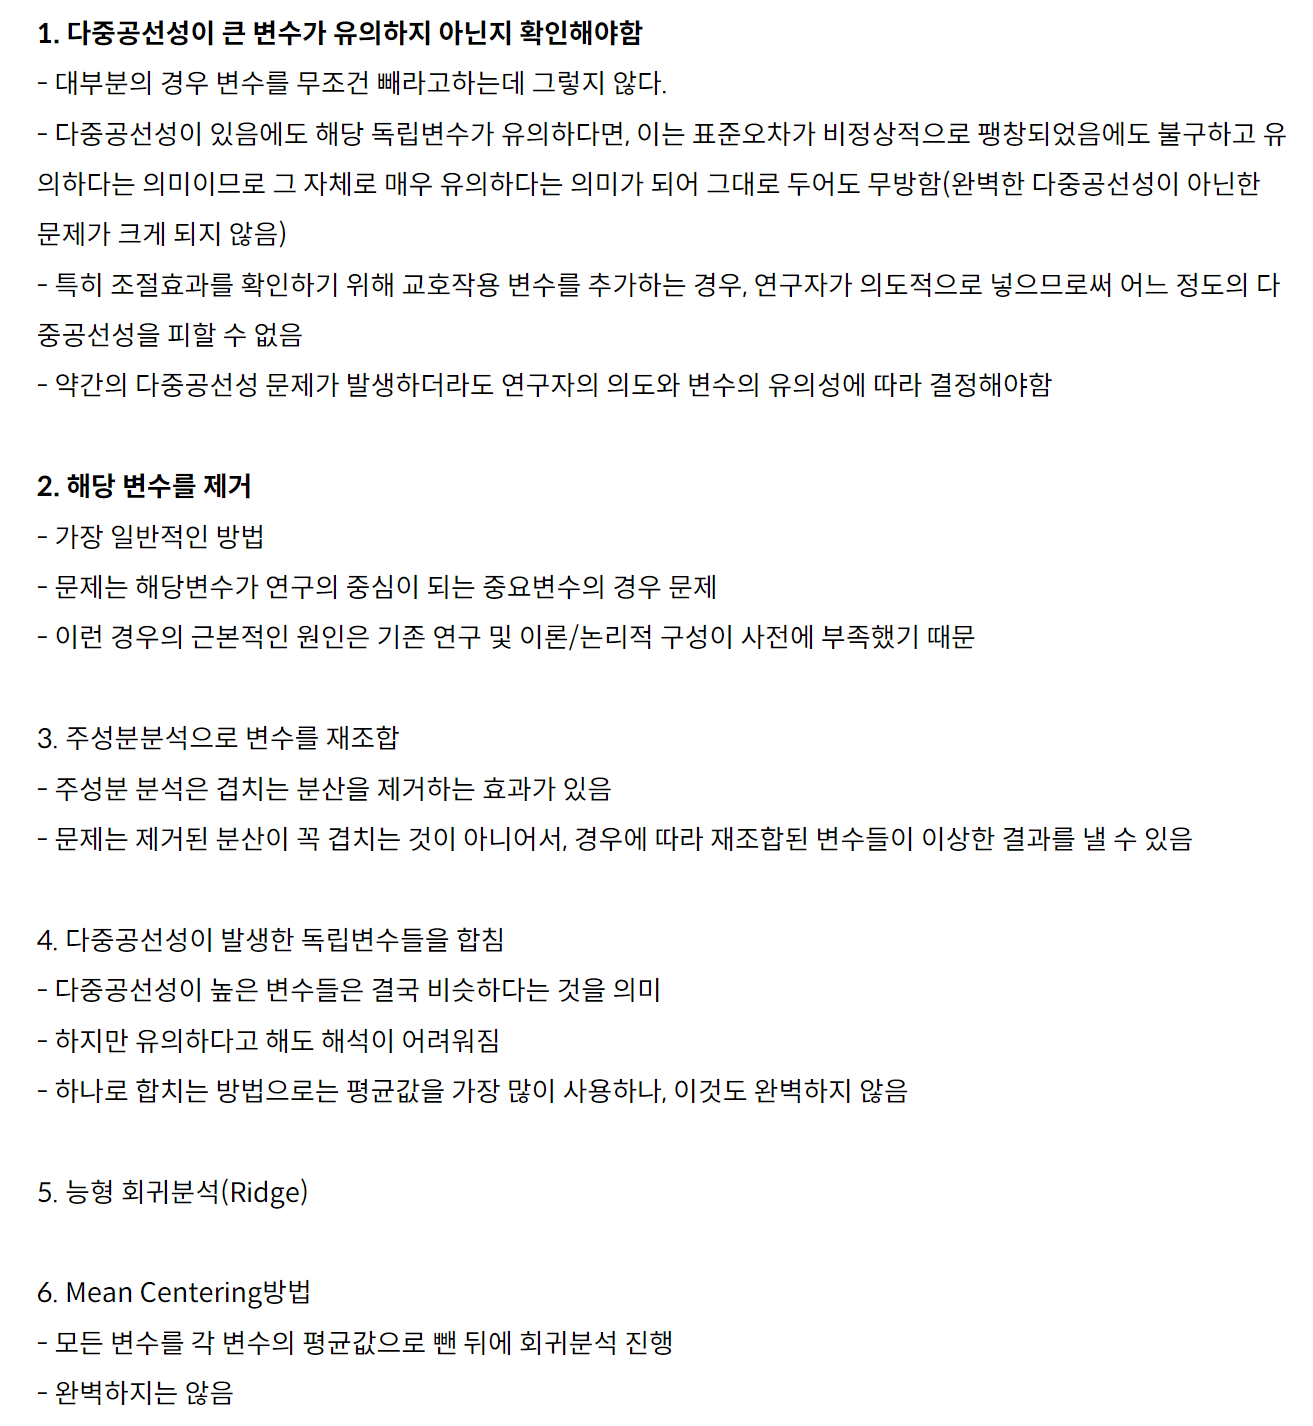

# PCA

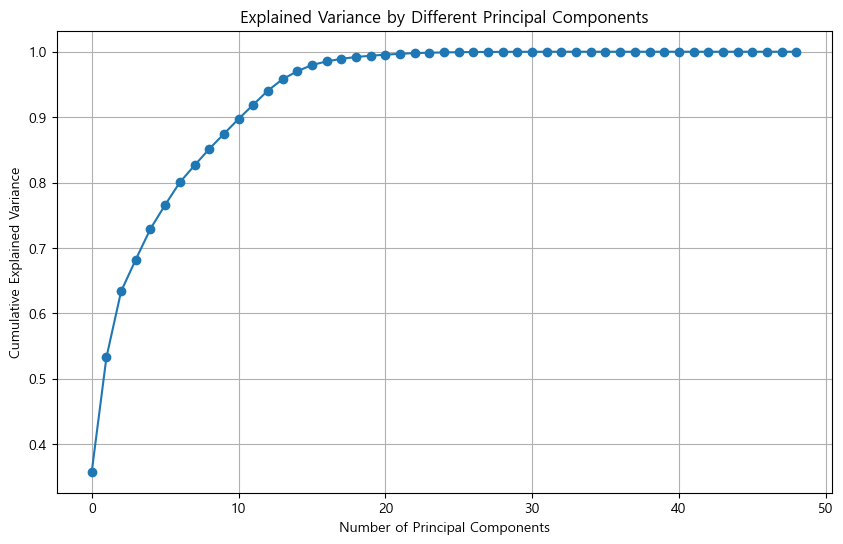

In [53]:
#pca 모델 생성 (초기에는 모든 주성분 사용)
pca = PCA().fit(X_std)

#누적 설명된 분산 비율 계산
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

#누적 설명된 분산을 그래프로 표시
plt.figure(figsize=(10,6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel("Cumulative Explained Variance")
plt.title('Explained Variance by Different Principal Components')
plt.grid()

In [54]:
for i in [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
  target_variance = i
  n_components = np.where(cumulative_variance >= target_variance)[0][0] + 1
  print(f"누적 분산율이 {target_variance*100}%일 때 필요한 주성분의 수: {n_components}")

누적 분산율이 70.0%일 때 필요한 주성분의 수: 5
누적 분산율이 75.0%일 때 필요한 주성분의 수: 6
누적 분산율이 80.0%일 때 필요한 주성분의 수: 7
누적 분산율이 85.0%일 때 필요한 주성분의 수: 9
누적 분산율이 90.0%일 때 필요한 주성분의 수: 12
누적 분산율이 95.0%일 때 필요한 주성분의 수: 14


In [55]:
pca = PCA(n_components = 12, random_state = 42)
pca.fit(X)

PCA(n_components=12, random_state=42)

In [56]:
X_pca = pca.fit_transform(X)

In [57]:
print(X_pca.shape)
print(y.shape)

(7755, 12)
(7755, 1)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(4653, 12) (1551, 12) (1551, 12) (4653, 1) (1551, 1) (1551, 1)


In [59]:
X_train = pd.DataFrame(X_train, columns=[f'PC{i+1}' for i in range(X_train.shape[1])])
X_val = pd.DataFrame(X_val, columns=[f'PC{i+1}' for i in range(X_val.shape[1])])
X_test = pd.DataFrame(X_test, columns=[f'PC{i+1}' for i in range(X_test.shape[1])])

In [60]:
print(X_train)

               PC1           PC2            PC3            PC4           PC5          PC6          PC7          PC8          PC9         PC10        PC11        PC12
0    -1.354994e+06 -1.136915e+06 -463029.935796  267729.294509  15084.533047 -2109.819046 -1506.509610  1819.818763   -49.893601  -128.824079    3.468529   -4.258821
1    -1.320940e+06 -1.442300e+06  100339.583672 -233875.849349   2462.140848  -292.300160  -304.177815 -2640.601049   243.871161     8.835905   93.734239   38.092417
2    -1.354994e+06 -1.136915e+06 -463029.935808  267729.294510  15084.532776 -2109.818627 -1506.508389  1819.818607   -49.893821  -128.826286    3.464571   -4.265736
3     1.152699e+07 -7.332002e+05  243431.960756  258593.959030 -17600.127835  -957.102952  -993.329279   762.353388   276.171977   265.978641   66.795075  -42.630370
4     1.155237e+06  1.501442e+06  131631.298533 -139756.379012  13515.889092  4257.979889   457.723877  1423.524694   668.372431  -650.056475  705.644885 -154.796941
... 

In [61]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12'],
      dtype='object')

In [62]:
reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)


pred_train = reg.predict(X_train)
pred_train2 = reg2.predict(X_train)
pred_train3 = reg3.predict(X_train)
pred_train4 = reg4.predict(X_train)
pred_train5 = reg5.predict(X_train)

pred_val = reg.predict(X_val)
pred_val2 = reg2.predict(X_val)
pred_val3 = reg3.predict(X_val)
pred_val4 = reg4.predict(X_val)
pred_val5 = reg5.predict(X_val)

mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)
mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)
mse_train3 = mean_squared_error(y_train, pred_train3)
mse_val3 = mean_squared_error(y_val, pred_val3)
mse_train4 = mean_squared_error(y_train, pred_train4)
mse_val4 = mean_squared_error(y_val, pred_val4)
mse_train5 = mean_squared_error(y_train, pred_train5)
mse_val5 = mean_squared_error(y_val, pred_val5)

print("1. Linear Regression\t, train = %.4f, val = %.4f" %(mse_train, mse_val))
print("2. Lasso\t\t, train = %.4f, val = %.4f" %(mse_train2, mse_val2))
print("3. Ridge\t\t, train = %.4f, val = %.4f" %(mse_train3, mse_val3))
print("4. XGBoost\t\t, train = %.4f, val = %.4f" %(mse_train4, mse_val4)) 
print("5. LightGBM\t\t, train = %.4f, val = %.4f" %(mse_train5, mse_val5))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 4653, number of used features: 12
[LightGBM] [Info] Start training from score 5443.272918
1. Linear Regression	, train = 4304099.1987, val = 4383326.6543
2. Lasso		, train = 4304099.1987, val = 4383327.9651
3. Ridge		, train = 4304099.1987, val = 4383326.6543
4. XGBoost		, train = 1746414.0940, val = 4209053.8903
5. LightGBM		, train = 2715870.8839, val = 3655353.2495


In [63]:
#prediction
result = reg.predict(X_test)
result2 = reg2.predict(X_test)
result3 = reg3.predict(X_test)
result4 = reg4.predict(X_test)
result5 = reg5.predict(X_test)

In [64]:
print("Linear Regression 훈련 세트 예측값:")
print(pred_train)

print("Lasso 훈련 세트 예측값:")
print(pred_train2)

print("Ridge 훈련 세트 예측값:")
print(pred_train3)

print("XGBoost 훈련 세트 예측값:")
print(pred_train4)

print("LightGBM 훈련 세트 예측값:")
print(pred_train5)

Linear Regression 훈련 세트 예측값:
[[4865.92201044]
 [5138.55974625]
 [4865.92119395]
 ...
 [6452.96930091]
 [4865.92175097]
 [6342.34795639]]
Lasso 훈련 세트 예측값:
[4865.9211016  5138.56172328 4865.92028523 ... 6452.96035952 4865.92084213
 6342.35652527]
Ridge 훈련 세트 예측값:
[[4865.92201044]
 [5138.55974625]
 [4865.92119395]
 ...
 [6452.96930078]
 [4865.92175097]
 [6342.34795657]]
XGBoost 훈련 세트 예측값:
[4421.218  6694.2803 4087.4604 ... 6134.1025 3841.5493 5605.3267]
LightGBM 훈련 세트 예측값:
[4829.90305539 6596.39957021 3755.79381541 ... 5685.23244316 3889.8642244
 6141.60765149]


In [65]:
print("Linear Regression 검증 세트 예측값:")
print(pred_val)

print("Lasso 검증 세트 예측값:")
print(pred_val2)

print("Ridge 검증 세트 예측값:")
print(pred_val3)

print("XGBoost 검증 세트 예측값:")
print(pred_val4)

print("LightGBM 검증 세트 예측값:")
print(pred_val5)

Linear Regression 검증 세트 예측값:
[[5642.91742411]
 [4865.92154973]
 [5554.87477476]
 ...
 [4946.58893875]
 [5276.21540244]
 [4865.92138379]]
Lasso 검증 세트 예측값:
[5642.91800911 4865.92064093 5554.87370047 ... 4946.58861987 5276.22499939
 4865.92047501]
Ridge 검증 세트 예측값:
[[5642.91742417]
 [4865.92154972]
 [5554.87477475]
 ...
 [4946.58893874]
 [5276.21540259]
 [4865.92138379]]
XGBoost 검증 세트 예측값:
[7068.151  4078.5005 6289.946  ... 5284.5703 4975.239  4428.827 ]
LightGBM 검증 세트 예측값:
[5505.68123155 3989.32493068 6077.63221147 ... 5628.55801712 5255.82697196
 4128.2406794 ]


In [66]:
#summary
print('----------Linear Regression ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result))

print('----------Lasso ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result2))

print('----------Ridge ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result3))

print('----------XGBoost ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result4))

print('----------LightGBM ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result5))

----------Linear Regression ----------
MSE in training: 4757306.6689
----------Lasso ----------
MSE in training: 4757306.7665
----------Ridge ----------
MSE in training: 4757306.6689
----------XGBoost ----------
MSE in training: 3949752.0242
----------LightGBM ----------
MSE in training: 3669584.3123


In [67]:
# 각 모델의 R² 점수 계산
r2_train_reg = r2_score(y_train, pred_train)
r2_val_reg = r2_score(y_val, pred_val)

r2_train_reg2 = r2_score(y_train, pred_train2)
r2_val_reg2 = r2_score(y_val, pred_val2)

r2_train_reg3 = r2_score(y_train, pred_train3)
r2_val_reg3 = r2_score(y_val, pred_val3)

r2_train_reg4 = r2_score(y_train, pred_train4)
r2_val_reg4 = r2_score(y_val, pred_val4)

r2_train_reg5 = r2_score(y_train, pred_train5)
r2_val_reg5 = r2_score(y_val, pred_val5)

# 결과 출력
print("1. Linear Regression R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg * 100, r2_val_reg * 100))
print("2. Lasso R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg2 * 100, r2_val_reg2 * 100))
print("3. Ridge R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg3 * 100, r2_val_reg3 * 100))
print("4. XGBoost R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg4 * 100, r2_val_reg4 * 100))
print("5. LightGBM R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg5 * 100, r2_val_reg5 * 100))

1. Linear Regression R², train = 10.88%, val = 11.09%
2. Lasso R², train = 10.88%, val = 11.09%
3. Ridge R², train = 10.88%, val = 11.09%
4. XGBoost R², train = 63.84%, val = 14.62%
5. LightGBM R², train = 43.76%, val = 25.85%


# RMSE

In [69]:
print(X.columns)
print(y.columns)

Index(['아파트 브랜드_래미안', '계약연도2020', '계약연도2021', '계약연도2022', '클러스터링_구_cluster 1',
       '클러스터링_구_cluster 2', '클러스터링_구_cluster 3', '클러스터링_구_cluster 4',
       '클러스터링_구_cluster 5', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '아파트 건물면적_(천)', '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', '

In [70]:
print(X.shape)
print(y.shape)

(7755, 49)
(7755, 1)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(4653, 49) (1551, 49) (1551, 49) (4653, 1) (1551, 1) (1551, 1)


In [72]:
print(X_train)

      아파트 브랜드_래미안  계약연도2020  계약연도2021  계약연도2022  클러스터링_구_cluster 1  클러스터링_구_cluster 2  클러스터링_구_cluster 3  클러스터링_구_cluster 4  클러스터링_구_cluster 5         층      건축년도  건설수주_건축(단위 백만원)  건설수주_주택(단위 백만원)  매매가격지수(아파트)  경상수지(백만불)  무역수지(백만불)  대출금액(아파트)(억원)  대출잔액(아파트)(억원)  서울_신규_분양세대(단위: 세대)  아파트 동(호)수_(단위: 호)  아파트 건물면적_(천)  생산자물가지수 총지수   전규모(1인이상) 전체임금총액[원]  소비자물가지수 총지수   소비자물가지수 주택, 수도, 전기 및 연료  가계대출 (연리%)  경기종합지수(2020=100)  경제활동인구_ 실업률(단위: %)  경제활동인구_고용률(단위: %)  경제활동인구_취업자(단위: 천명)  국제 주요국 주가지수(KOSPI)  예금은행 대출금리(신규취급액 기준)_대출평균(연%)  예금은행 대출금리(잔액 기준)_총대출(연리%)  주택매매가격지수(KB)_서울  소비자물가지수_총지수(가중치:1000?)  원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원    경기종합지수  S&P 500_close  S&P 500_change_rate  NASDAQ_close  NASDAQ_change_rate  DOW Jones_close  DOW Jones_change_rate  KRX300_close  KRX300_change_rate  KOSPI_close  KOSPI_change_rate  KOSDAQ_close  KOSDAQ_change_rate
4448          0.0  0.769677 -0.655759  -0.27710          -0.674111          -0.978945          -0.259422           2.930172          -0.178322  0.28

In [73]:
X_train.columns

Index(['아파트 브랜드_래미안', '계약연도2020', '계약연도2021', '계약연도2022', '클러스터링_구_cluster 1',
       '클러스터링_구_cluster 2', '클러스터링_구_cluster 3', '클러스터링_구_cluster 4',
       '클러스터링_구_cluster 5', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '아파트 건물면적_(천)', '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', '

In [74]:
# 모델 학습을 위해 X_train 데이터프레임 컬럼명 변경
X_train.columns = [
    col.replace('(', '').replace(')', '').replace(',', '').replace('/', '_').replace(':', '_').replace('%', 'pct').replace(' ', '_').replace('[', '').replace(']', '')
    for col in X_train.columns
]

X_val.columns = [
    col.replace('(', '').replace(')', '').replace(',', '').replace('/', '_').replace(':', '_').replace('%', 'pct').replace(' ', '_').replace('[', '').replace(']', '')
    for col in X_val.columns
]

X_test.columns = [
    col.replace('(', '').replace(')', '').replace(',', '').replace('/', '_').replace(':', '_').replace('%', 'pct').replace(' ', '_').replace('[', '').replace(']', '')
    for col in X_test.columns
]

reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)


pred_train = reg.predict(X_train)
pred_train2 = reg2.predict(X_train)
pred_train3 = reg3.predict(X_train)
pred_train4 = reg4.predict(X_train)
pred_train5 = reg5.predict(X_train)

pred_val = reg.predict(X_val)
pred_val2 = reg2.predict(X_val)
pred_val3 = reg3.predict(X_val)
pred_val4 = reg4.predict(X_val)
pred_val5 = reg5.predict(X_val)

mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)
mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)
mse_train3 = mean_squared_error(y_train, pred_train3)
mse_val3 = mean_squared_error(y_val, pred_val3)
mse_train4 = mean_squared_error(y_train, pred_train4)
mse_val4 = mean_squared_error(y_val, pred_val4)
mse_train5 = mean_squared_error(y_train, pred_train5)
mse_val5 = mean_squared_error(y_val, pred_val5)

print("1. Linear Regression\t, train = %.4f, val = %.4f" %(mse_train, mse_val))
print("2. Lasso\t\t, train = %.4f, val = %.4f" %(mse_train2, mse_val2))
print("3. Ridge\t\t, train = %.4f, val = %.4f" %(mse_train3, mse_val3))
print("4. XGBoost\t\t, train = %.4f, val = %.4f" %(mse_train4, mse_val4)) 
print("5. LightGBM\t\t, train = %.4f, val = %.4f" %(mse_train5, mse_val5))

C:\Users\2001_\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.073e+07, tolerance: 2.247e+06
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1359
[LightGBM] [Info] Number of data points in the train set: 4653, number of used features: 48
[LightGBM] [Info] Start training from score 5443.272918
1. Linear Regression	, train = 3190617.8607, val = 3364992.8254
2. Lasso		, train = 3201331.1361, val = 3310375.4196
3. Ridge		, train = 3194735.3306, val = 3335927.6475
4. XGBoost		, train = 552211.9595, val = 1986705.3065
5. LightGBM		, train = 1034989.5543, val = 1738521.8466


In [75]:
#prediction
result = reg.predict(X_test)
result2 = reg2.predict(X_test)
result3 = reg3.predict(X_test)
result4 = reg4.predict(X_test)
result5 = reg5.predict(X_test)

In [76]:
print("Linear Regression 훈련 세트 예측값:")
print(pred_train)

print("Lasso 훈련 세트 예측값:")
print(pred_train2)

print("Ridge 훈련 세트 예측값:")
print(pred_train3)

print("XGBoost 훈련 세트 예측값:")
print(pred_train4)

print("LightGBM 훈련 세트 예측값:")
print(pred_train5)

Linear Regression 훈련 세트 예측값:
[[4303.658661  ]
 [6835.41633158]
 [4417.314911  ]
 ...
 [5842.38826393]
 [3735.939911  ]
 [6764.06546201]]
Lasso 훈련 세트 예측값:
[4309.05662378 6845.63913132 4416.48547977 ... 5789.11592161 3734.21333562
 6935.36158148]
Ridge 훈련 세트 예측값:
[[4306.49379345]
 [6866.46266681]
 [4423.32663958]
 ...
 [5790.33026738]
 [3736.92666471]
 [6865.13095952]]
XGBoost 훈련 세트 예측값:
[3624.7136 6276.2007 3730.0527 ... 6721.7793 2773.4365 5571.874 ]
LightGBM 훈련 세트 예측값:
[3888.07807132 5936.66921562 4126.69476548 ... 6356.72105415 3181.8141855
 5268.01173499]


In [77]:
print("Linear Regression 검증 세트 예측값:")
print(pred_val)

print("Lasso 검증 세트 예측값:")
print(pred_val2)

print("Ridge 검증 세트 예측값:")
print(pred_val3)

print("XGBoost 검증 세트 예측값:")
print(pred_val4)

print("LightGBM 검증 세트 예측값:")
print(pred_val5)

Linear Regression 검증 세트 예측값:
[[5721.01008324]
 [4338.611786  ]
 [6820.35347216]
 ...
 [5852.18897353]
 [5483.7117321 ]
 [3883.955536  ]]
Lasso 검증 세트 예측값:
[5733.81645621 4341.30794678 6801.83143806 ... 5864.34914871 5515.2747974
 3887.51879478]
Ridge 검증 세트 예측값:
[[5729.40982073]
 [4343.2602942 ]
 [6835.43453128]
 ...
 [5853.36142867]
 [5502.78655877]
 [3889.0941325 ]]
XGBoost 검증 세트 예측값:
[8343.593  4305.659  6824.9927 ... 6136.569  4695.496  3843.1824]
LightGBM 검증 세트 예측값:
[7255.79035606 4357.27064886 6750.91887012 ... 6225.36324564 4965.36567284
 3874.81879056]


In [78]:
#summary
print('----------Linear Regression ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result))

print('----------Lasso ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result2))

print('----------Ridge ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result3))

print('----------XGBoost ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result4))

print('----------LightGBM ----------')
print('MSE in training: %.4f' %mean_squared_error(y_test, result5))

----------Linear Regression ----------
MSE in training: 3421013.2837
----------Lasso ----------
MSE in training: 3392384.9117
----------Ridge ----------
MSE in training: 3409903.0719
----------XGBoost ----------
MSE in training: 1762034.9132
----------LightGBM ----------
MSE in training: 1716396.1764


In [79]:
# 각 모델의 R² 점수 계산
r2_train_reg = r2_score(y_train, pred_train)
r2_val_reg = r2_score(y_val, pred_val)

r2_train_reg2 = r2_score(y_train, pred_train2)
r2_val_reg2 = r2_score(y_val, pred_val2)

r2_train_reg3 = r2_score(y_train, pred_train3)
r2_val_reg3 = r2_score(y_val, pred_val3)

r2_train_reg4 = r2_score(y_train, pred_train4)
r2_val_reg4 = r2_score(y_val, pred_val4)

r2_train_reg5 = r2_score(y_train, pred_train5)
r2_val_reg5 = r2_score(y_val, pred_val5)

# 결과 출력
print("1. Linear Regression R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg * 100, r2_val_reg * 100))
print("2. Lasso R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg2 * 100, r2_val_reg2 * 100))
print("3. Ridge R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg3 * 100, r2_val_reg3 * 100))
print("4. XGBoost R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg4 * 100, r2_val_reg4 * 100))
print("5. LightGBM R², train = {:.2f}%, val = {:.2f}%".format(r2_train_reg5 * 100, r2_val_reg5 * 100))

1. Linear Regression R², train = 33.93%, val = 31.74%
2. Lasso R², train = 33.71%, val = 32.85%
3. Ridge R², train = 33.85%, val = 32.33%
4. XGBoost R², train = 88.57%, val = 59.70%
5. LightGBM R², train = 78.57%, val = 64.73%


과적합 의심